In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_json('../data/Musical_Instruments_5.json', lines = True)

In [3]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df.reviewTime=pd.to_datetime(df.reviewTime)
df.drop(columns=['unixReviewTime'], inplace=True)
df.rename(columns={'asin':'product_id'}, inplace=True)

### Clean up 'helpfulness' of reviews

In [5]:
df.helpful.value_counts()

[0, 0]      6796
[1, 1]      1159
[2, 2]       377
[0, 1]       334
[1, 2]       231
            ... 
[38, 40]       1
[88, 89]       1
[9, 18]        1
[25, 26]       1
[42, 43]       1
Name: helpful, Length: 269, dtype: int64

In [6]:
df['helpful_perc']=df.helpful.apply(lambda x: 0 if x[0]==0 or x[1]==0 else x[0]/x[1])
df['helpful_count']=df.helpful.apply(lambda x: x[0])

#### When were the reviewes written?

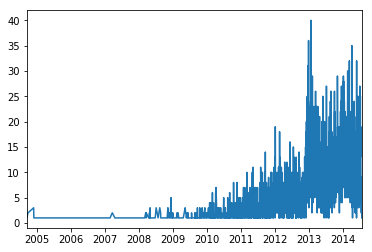

In [7]:
df.reviewTime.dt.date.value_counts().plot()

#### How many words in the review text?  Do longer reviews get more helpful counts? helpful perc?

In [8]:
df['review_wc']=df.reviewText.apply(lambda text: len(text.split()))

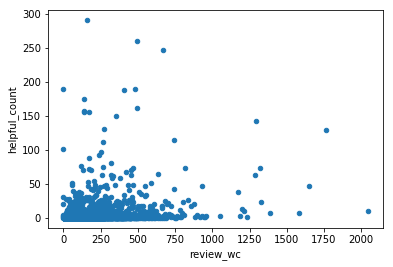

In [11]:
df.plot.scatter(x='review_wc', y='helpful_count')

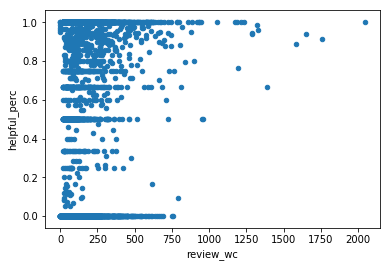

In [12]:
df.plot.scatter(x='review_wc', y='helpful_perc')

## Visualizing Reviews -- Word Cloud

In [13]:
from wordcloud import WordCloud
from PIL import Image
# guitar mask
g_mask = np.array(Image.open("../img/guitar.png"))

# Transform the mask 
transformed_g_mask = np.ndarray((g_mask.shape[0],g_mask.shape[1]), np.int32)

for i in range(len(transformed_g_mask)):
    transformed_g_mask[i] = list(map(lambda x: 255 if x ==0 else x, transformed_g_mask[i]))

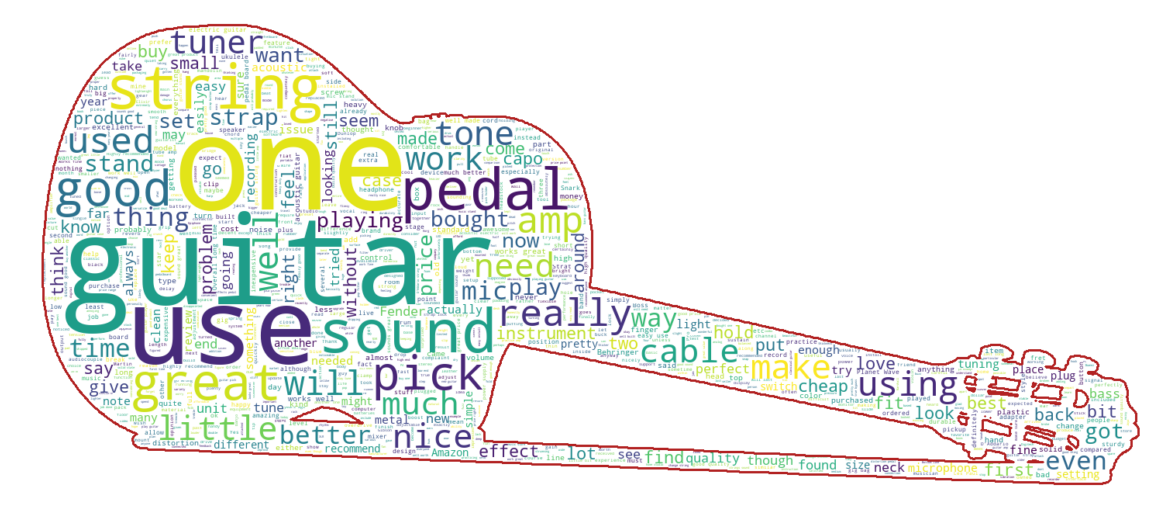

In [14]:
# combine all reviews
text=' '.join(df['reviewText'].tolist())

wc = WordCloud(background_color="white", max_words=1000, mask=transformed_g_mask,
               contour_width=2, contour_color='firebrick')

wc.generate(text) # Generate a wordcloud
wc.to_file("../img/wc_guitar_mask.png") # store to file

plt.figure(figsize=[20,10]) # show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
